# Proyecto Final Congestión

### Ignacio Casado Ternero

In [359]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [360]:
data = pd.read_csv('train.csv', parse_dates=['date'])

In [361]:
test = pd.read_csv('test.csv', parse_dates=['date'])

### Tratamiento de Datos

In [362]:
data.head()

,country,city,date,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,commercial,utilities,other
0,Austria,Graz,2019-12-30,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,50,1
1,Austria,Vienna,2019-12-30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,51,1
2,Belgium,Brussels,2019-12-30,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,50,1
3,Belgium,Charleroi,2019-12-30,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,52,1
4,Czechia,Brno,2019-12-30,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,51,1


In [363]:
data.shape

(27880, 16)

#### Creación de Variables

In [364]:
data['month'] = pd.to_datetime(data['date']).dt.month

In [365]:
data['weekday'] = pd.to_datetime(data['date']).dt.weekday
weekday_dummies = pd.get_dummies(data['weekday'], prefix='weekday')
data = pd.concat([data, weekday_dummies], axis=1)

In [366]:
city_list = data['city'].unique()

In [367]:
city_congestion_avg = {}
for city in city_list:
    city_data = data[data['city'] == city]
    avg_congestion = city_data['congestion'].mean()
    city_congestion_avg[city] = avg_congestion

In [368]:
data['city_avg_congestion'] = data['city'].map(city_congestion_avg)

In [369]:
# Leer el archivo de lluvia
rain_data = pd.read_csv("precipitation.csv",parse_dates=['date'])

# Renombrar las columnas de fecha y ciudad en el archivo de lluvia para que coincidan con las del archivo de entrenamiento
rain_data = rain_data.rename(columns={'City':'city'})

# Realizar una unión en función de la fecha y la ciudad
data = pd.merge(data, rain_data, on=['date', 'city'], how= 'left')

# Crear una instancia de SimpleImputer, especificando median como método de imputación
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a la columna 'precipitation' del dataframe
data['percipitation'] = imputer.fit_transform(data[['percipitation']])

In [370]:
poblacion = {'Graz':282479, 'Vienna':1920949, 'Brussels':1223520, 'Charleroi':201761, 'Brno':377973, 'Prague':1335084,
       'Copenhagen':799033, 'Tallinn':413782, 'Helsinki':656611, 'Grenoble':160779, 'Lille':233897, 'Paris':2148271,
       'Berlin':3664088, 'Bremen':566573, 'Cologne':1083498, 'Dresden':556227, 'Munich':1562096, 'Athens':665000,
       'Budapest':1752286, 'Cork':125622, 'Dublin':526750, 'Bologna':387423, 'Catania':313396, 'Milan':1396522,
       'Rome':2778662, 'Eindhoven':227100, 'Groningen':200952, 'Krakow':779966, 'Poznan':532048, 'Lisbon':544851,
       'Porto':237559, 'Bucharest':1877155, 'Alicante':330525, 'Barcelona':1664182, 'Madrid':3334730, 'Malaga':578460,
       'Seville':691395, 'Gothenburg':604829, 'Malmo':307496, 'Stockholm':975819}

In [371]:
data['population'] = data['city'].map(poblacion)

In [372]:
cities = data['city'].unique()
cities

array(['Graz', 'Vienna', 'Brussels', 'Charleroi', 'Brno', 'Prague',
       'Copenhagen', 'Tallinn', 'Helsinki', 'Grenoble', 'Lille', 'Paris',
       'Berlin', 'Bremen', 'Cologne', 'Dresden', 'Munich', 'Athens',
       'Budapest', 'Cork', 'Dublin', 'Bologna', 'Catania', 'Milan',
       'Rome', 'Eindhoven', 'Groningen', 'Krakow', 'Poznan', 'Lisbon',
       'Porto', 'Bucharest', 'Alicante', 'Barcelona', 'Madrid', 'Malaga',
       'Seville', 'Gothenburg', 'Malmo', 'Stockholm'], dtype=object)

In [373]:
data.head()

,country,city,date,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
0,Austria,Graz,2019-12-30,23,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,23.022956,0.0,282479
1,Austria,Vienna,2019-12-30,18,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,24.955524,0.0,1920949
2,Belgium,Brussels,2019-12-30,24,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,30.308465,-9999.0,1223520
3,Belgium,Charleroi,2019-12-30,15,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,14.048780,-9999.0,201761
4,Czechia,Brno,2019-12-30,14,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,25.117647,0.0,377973


In [374]:
data.dtypes

country                          object
city                             object
date                     datetime64[ns]
congestion                        int64
driving                         float64
transit                         float64
walking                         float64
retail_and_recreation           float64
grocery_and_pharmacy            float64
parks                           float64
transit_stations                float64
workplaces                      float64
residential                     float64
commercial                        int64
utilities                         int64
other                             int64
month                             int64
weekday                           int64
weekday_0                         uint8
weekday_1                         uint8
weekday_2                         uint8
weekday_3                         uint8
weekday_4                         uint8
weekday_5                         uint8
weekday_6                         uint8


In [375]:
data.columns

Index(['country', 'city', 'date', 'congestion', 'driving', 'transit',
       'walking', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'month', 'weekday', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'city_avg_congestion', 'percipitation', 'population'],
      dtype='object')

In [376]:
data.describe()

,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
count,27880.000000,27200.000000,14290.000000,27218.000000,25975.000000,25980.000000,25215.000000,25994.000000,25988.000000,26000.000000,...,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,2.788000e+04
mean,23.625897,2.140821,24.555223,1.154557,-28.101482,-4.531601,19.156098,-32.297569,-27.809720,8.335231,...,0.144907,0.144907,0.143472,0.142037,0.140603,0.142037,0.142037,23.625897,-3873.138307,9.504837e+05
std,13.070731,38.930643,101.876852,53.957496,24.406120,20.504869,53.365451,21.583234,20.414158,8.190635,...,0.352013,0.352013,0.350560,0.349095,0.347617,0.349095,0.349095,6.486111,4882.110578,8.589812e+05
min,0.000000,-93.830000,-95.890000,-97.570000,-98.000000,-96.000000,-97.000000,-94.000000,-93.000000,-14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.823529,-9999.000000,1.256220e+05
25%,14.000000,-23.662500,-30.627500,-38.377500,-43.000000,-13.000000,-15.000000,-46.000000,-40.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.380918,-9999.000000,3.262428e+05
50%,21.000000,1.620000,1.600000,-4.860000,-24.000000,-3.000000,10.000000,-32.000000,-28.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.225251,0.000000,5.916445e+05
75%,32.000000,27.020000,42.715000,32.550000,-10.000000,6.000000,46.000000,-18.000000,-14.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.480631,0.000000,1.350444e+06
max,137.000000,240.210000,842.680000,311.440000,54.000000,208.000000,356.000000,69.000000,71.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.529412,1535.000000,3.664088e+06


In [377]:
data.isna()

,country,city,date,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
0,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [378]:
((data.isna().sum()/data.shape[0]).sort_values())*100

country                   0.000000
city_avg_congestion       0.000000
weekday_6                 0.000000
weekday_5                 0.000000
weekday_4                 0.000000
weekday_3                 0.000000
weekday_2                 0.000000
weekday_1                 0.000000
weekday_0                 0.000000
weekday                   0.000000
month                     0.000000
other                     0.000000
utilities                 0.000000
commercial                0.000000
congestion                0.000000
date                      0.000000
city                      0.000000
percipitation             0.000000
population                0.000000
walking                   2.374462
driving                   2.439024
residential               6.743185
transit_stations          6.764706
workplaces                6.786227
grocery_and_pharmacy      6.814921
retail_and_recreation     6.832855
parks                     9.558824
transit                  48.744620
dtype: float64

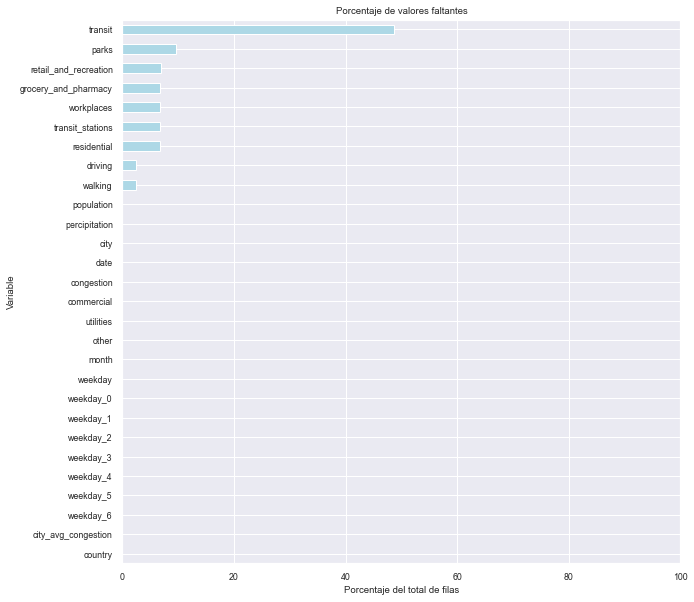

In [379]:
((data.isna().sum()/data.shape[0])*100).sort_values().plot(kind="barh",figsize=(10,10),color="lightblue")
plt.title('Porcentaje de valores faltantes')
plt.xlabel('Porcentaje del total de filas')
plt.ylabel('Variable')
plt.xlim(0, 100)
plt.show() 

In [380]:
# fill missing values with the median of the column
data.fillna(data.median(), inplace=True)

/var/folders/j7/r_tzv91j7bn8zq12xkj3hjt80000gn/T/ipykernel_60869/105451583.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.median(), inplace=True)
/var/folders/j7/r_tzv91j7bn8zq12xkj3hjt80000gn/T/ipykernel_60869/105451583.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [381]:
data.describe()

,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
count,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,...,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,27880.000000,2.788000e+04
mean,23.625897,2.128118,13.365787,1.011744,-27.821234,-4.427224,18.280882,-32.277439,-27.822633,8.245194,...,0.144907,0.144907,0.143472,0.142037,0.140603,0.142037,0.142037,23.625897,-3873.138307,9.504837e+05
std,13.070731,38.453015,73.832356,53.320889,23.580239,19.797582,50.822105,20.840538,19.709346,7.916735,...,0.352013,0.352013,0.350560,0.349095,0.347617,0.349095,0.349095,6.486111,4882.110578,8.589812e+05
min,0.000000,-93.830000,-95.890000,-97.570000,-98.000000,-96.000000,-97.000000,-94.000000,-93.000000,-14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.823529,-9999.000000,1.256220e+05
25%,14.000000,-22.900000,0.250000,-37.550000,-41.000000,-13.000000,-13.000000,-45.000000,-39.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.380918,-9999.000000,3.262428e+05
50%,21.000000,1.620000,1.600000,-4.860000,-24.000000,-3.000000,10.000000,-32.000000,-28.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.225251,0.000000,5.916445e+05
75%,32.000000,26.322500,3.082500,31.365000,-11.000000,5.000000,41.000000,-19.000000,-15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.480631,0.000000,1.350444e+06
max,137.000000,240.210000,842.680000,311.440000,54.000000,208.000000,356.000000,69.000000,71.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.529412,1535.000000,3.664088e+06


In [382]:
test.describe()

,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,commercial,utilities,other
count,5280.000000,2772.000000,5280.000000,5320.000000,5320.000000,5234.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,23.345426,132.774776,45.214792,-17.082707,7.476504,3.911731,-22.620301,-19.709774,6.783647,99.892857,51.627256,0.995865
std,25.132716,152.713895,50.524614,15.325887,21.641801,28.793867,14.150781,18.021398,4.610858,9.919652,2.073651,0.640477
min,-71.450000,-77.230000,-81.790000,-96.000000,-94.000000,-74.000000,-92.000000,-90.000000,-6.000000,64.000000,50.000000,-26.000000
25%,7.040000,34.777500,10.737500,-24.000000,-1.000000,-15.000000,-31.000000,-28.000000,4.000000,93.000000,51.000000,1.000000
50%,21.670000,70.350000,36.875000,-17.000000,8.000000,-1.000000,-23.000000,-17.000000,6.000000,100.000000,51.000000,1.000000
75%,37.650000,175.942500,70.602500,-10.000000,16.000000,17.000000,-13.000000,-8.000000,9.000000,107.000000,52.000000,1.000000
max,156.570000,918.180000,573.690000,62.000000,239.000000,198.000000,52.000000,106.000000,35.000000,142.000000,88.000000,27.000000


In [383]:
test['month'] = pd.to_datetime(test['date']).dt.month

In [384]:
test.shape

(5320, 16)

In [385]:
test['weekday'] = pd.to_datetime(test['date']).dt.weekday
weekday_dummies = pd.get_dummies(test['weekday'], prefix='weekday')
test = pd.concat([test, weekday_dummies], axis=1)

In [386]:
test['city_avg_congestion'] = test['city'].map(city_congestion_avg)

In [387]:
# Realizar una unión en función de la fecha y la ciudad
test = pd.merge(test, rain_data, on=['date', 'city'], how = 'left')

# Crear una instancia de SimpleImputer, especificando median como método de imputación
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a la columna 'precipitation' del dataframe
test['percipitation'] = imputer.fit_transform(test[['percipitation']])

In [388]:
test['population'] = test['city'].map(poblacion)

In [389]:
test.dtypes

country                          object
city                             object
date                     datetime64[ns]
driving                         float64
transit                         float64
walking                         float64
retail_and_recreation             int64
grocery_and_pharmacy              int64
parks                           float64
transit_stations                  int64
workplaces                        int64
residential                       int64
commercial                        int64
utilities                         int64
other                             int64
month                             int64
weekday                           int64
weekday_0                         uint8
weekday_1                         uint8
weekday_2                         uint8
weekday_3                         uint8
weekday_4                         uint8
weekday_5                         uint8
weekday_6                         uint8
city_avg_congestion             float64


In [390]:
test.columns

Index(['country', 'city', 'date', 'driving', 'transit', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'month', 'weekday', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'city_avg_congestion', 'percipitation', 'population'],
      dtype='object')

In [391]:
test.head()

,country,city,date,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
0,Austria,Graz,2021-12-01,0.97,NaN,0.84,-49,16,-14.0,-39,...,0,0,1,0,0,0,0,23.022956,6.0,282479
1,Austria,Vienna,2021-12-01,3.41,NaN,-22.73,-53,12,-8.0,-31,...,0,0,1,0,0,0,0,24.955524,3.0,1920949
2,Belgium,Brussels,2021-12-01,7.53,82.52,24.04,-22,9,-5.0,-27,...,0,0,1,0,0,0,0,30.308465,-9999.0,1223520
3,Belgium,Charleroi,2021-12-01,45.89,78.19,78.32,11,26,-17.0,-13,...,0,0,1,0,0,0,0,14.048780,-9999.0,201761
4,Czechia,Brno,2021-12-01,20.92,NaN,58.20,-18,24,-6.0,-14,...,0,0,1,0,0,0,0,25.117647,5.0,377973


In [392]:
test.isna()

,country,city,date,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,city_avg_congestion,percipitation,population
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [393]:
((test.isna().sum()/test.shape[0]).sort_values())*100

country                   0.000000
city_avg_congestion       0.000000
weekday_6                 0.000000
weekday_5                 0.000000
weekday_4                 0.000000
weekday_3                 0.000000
weekday_2                 0.000000
weekday_1                 0.000000
weekday_0                 0.000000
weekday                   0.000000
month                     0.000000
other                     0.000000
percipitation             0.000000
utilities                 0.000000
residential               0.000000
workplaces                0.000000
transit_stations          0.000000
grocery_and_pharmacy      0.000000
retail_and_recreation     0.000000
date                      0.000000
city                      0.000000
commercial                0.000000
population                0.000000
walking                   0.751880
driving                   0.751880
parks                     1.616541
transit                  47.894737
dtype: float64

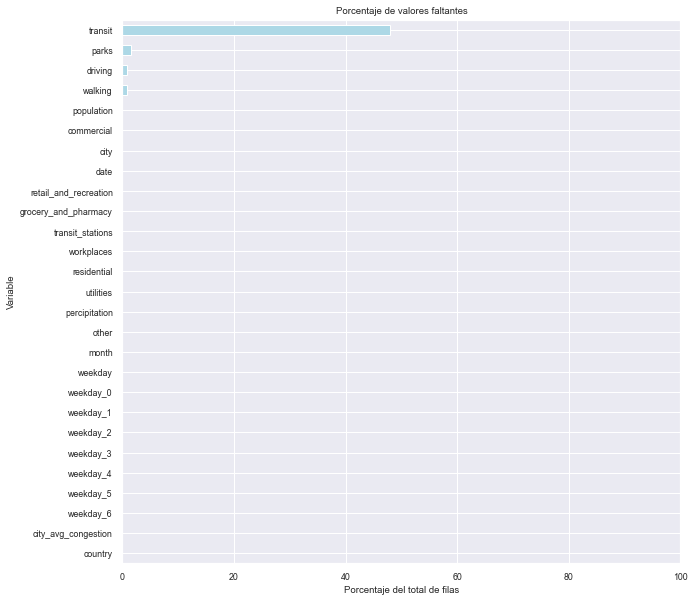

In [394]:
((test.isna().sum()/test.shape[0])*100).sort_values().plot(kind="barh",figsize=(10,10),color="lightblue")
plt.title('Porcentaje de valores faltantes')
plt.xlabel('Porcentaje del total de filas')
plt.ylabel('Variable')
plt.xlim(0, 100)
plt.show() 

In [395]:
# fill missing values with the median of the column
test.fillna(test.median(), inplace=True)

/var/folders/j7/r_tzv91j7bn8zq12xkj3hjt80000gn/T/ipykernel_60869/4228513445.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.fillna(test.median(), inplace=True)
/var/folders/j7/r_tzv91j7bn8zq12xkj3hjt80000gn/T/ipykernel_60869/4228513445.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.median(), inplace=True)


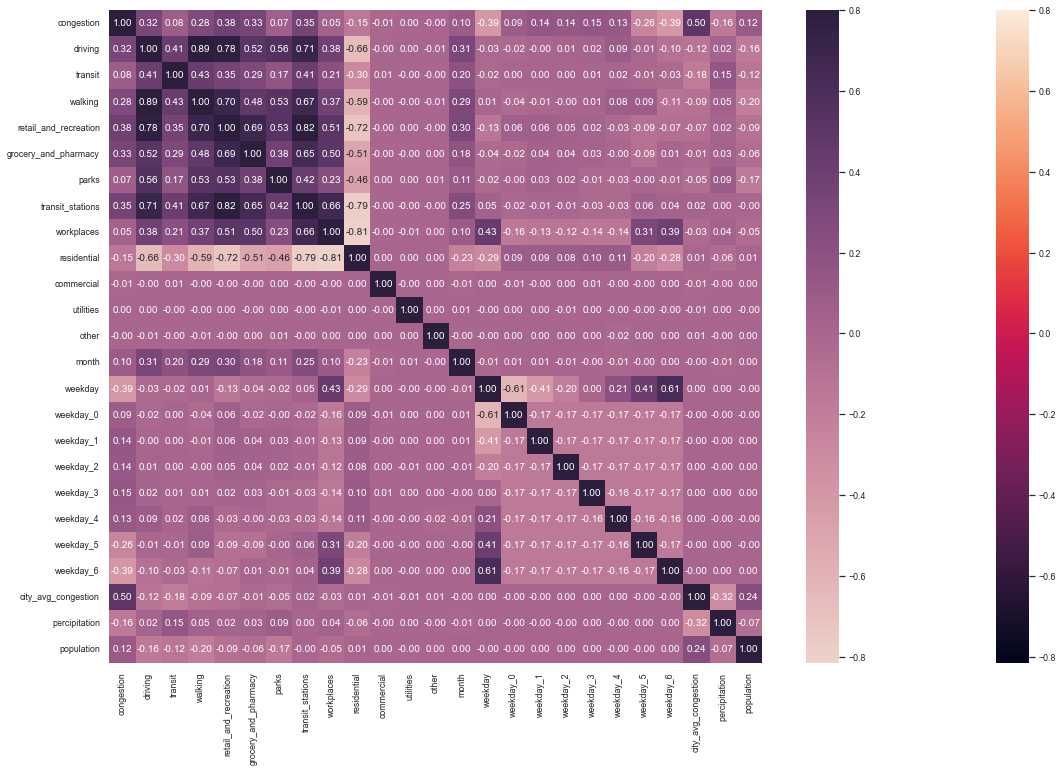

In [396]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

# Matriz de correlación

sns.set(font_scale = 0.8)
sns.heatmap(corrmat, vmax=.8,annot = True, square=False, fmt = '.2f',
            annot_kws = {'size': 10},cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

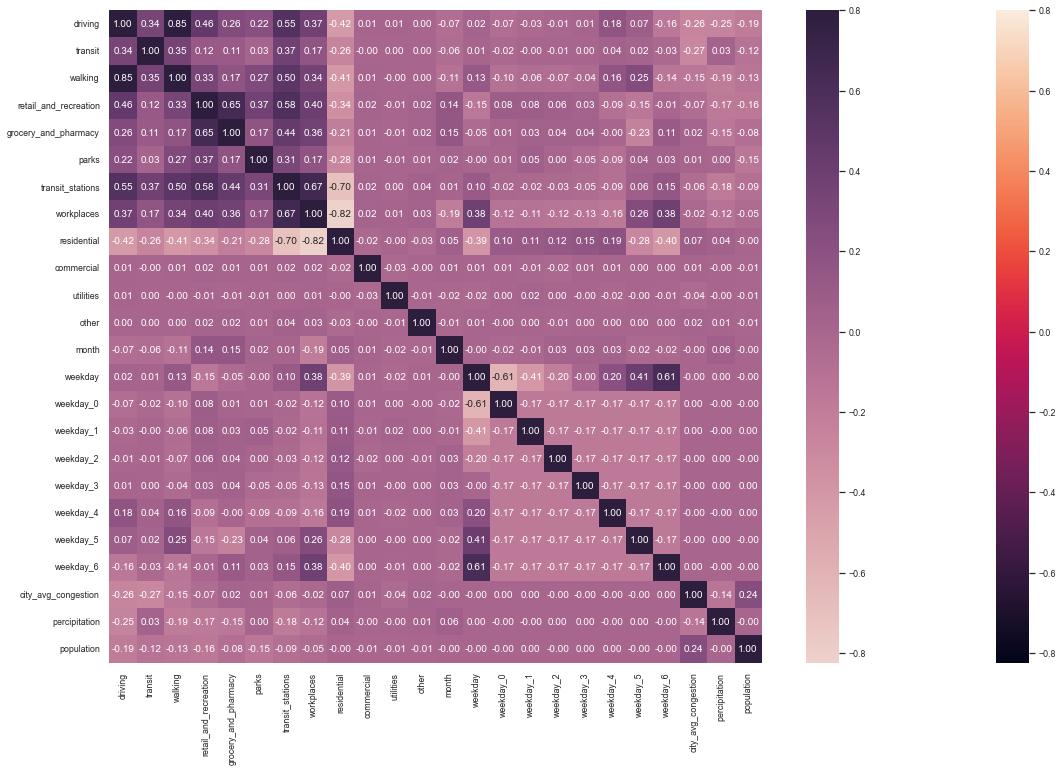

In [397]:
corrmat = test.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

# Matriz de correlación

sns.set(font_scale = 0.8)
sns.heatmap(corrmat, vmax=.8,annot = True, square=False, fmt = '.2f',
            annot_kws = {'size': 10},cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [398]:
data_features = [ 'driving', 'transit', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'month', 'weekday', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',] 

In [399]:
cities = data['city'].unique()
cities

array(['Graz', 'Vienna', 'Brussels', 'Charleroi', 'Brno', 'Prague',
       'Copenhagen', 'Tallinn', 'Helsinki', 'Grenoble', 'Lille', 'Paris',
       'Berlin', 'Bremen', 'Cologne', 'Dresden', 'Munich', 'Athens',
       'Budapest', 'Cork', 'Dublin', 'Bologna', 'Catania', 'Milan',
       'Rome', 'Eindhoven', 'Groningen', 'Krakow', 'Poznan', 'Lisbon',
       'Porto', 'Bucharest', 'Alicante', 'Barcelona', 'Madrid', 'Malaga',
       'Seville', 'Gothenburg', 'Malmo', 'Stockholm'], dtype=object)

### Modelo 

In [400]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Separar las variables predictivas y la variable objetivo
y = data.congestion

#data_features=['driving']
x = data[['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'month', 'weekday', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6','city_avg_congestion','percipitation']]

# Ajustando el modelo y seleccionando las características relevantes
train_x, val_x, train_y, val_y = train_test_split(x,y, train_size=0.9, test_size=0.1, shuffle=False)

model = GradientBoostingRegressor(n_estimators=2000,random_state=0) 

model.fit(train_x, train_y)

y_pred = model.predict(val_x)

#Calculamos el MAE para ver la eficacia de nuestro modelo
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(val_y, y_pred)
print("MAE: ", mae)

MAE:  4.379302068440087


In [401]:
x_test = test[['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'month', 'weekday', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6','city_avg_congestion', 'percipitation']]

In [402]:
final_predictions = model.predict(x_test)

In [403]:
final_predictions.shape

(5320,)

In [404]:
# Calcular el error en cada iteración
errors = [mean_squared_error(val_y, y_pred) for y_pred in model.staged_predict(val_x)]

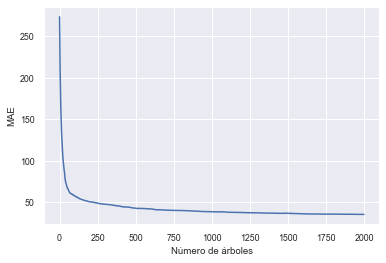

In [405]:
# Graficar el error en relación al número de árboles utilizados
plt.plot(errors)
plt.xlabel('Número de árboles')
plt.ylabel('MAE')
plt.show()

In [406]:
# create a DataFrame with the predictions
predictions = pd.DataFrame({'id':test['city'] + ' ' +test['date'].astype(str), 'congestion': final_predictions})

# Save the predictions to a CSV file
predictions.to_csv('predictions_2.csv', index=False, columns=['id', 'congestion'])

### Numero de Estimadores

In [407]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

def get_mae_est(n_estimators, train_x, val_x, train_y, val_y):
    model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

In [408]:
for estimators in [1, 5, 10, 15, 20, 25, 50, 75, 100, 150, 200, 500, 1000, 1500]:
    my_mae = get_mae_est(estimators, train_x, val_x, train_y, val_y)
    print("Max estimators: %d  \t\t Mean Absolute Error:  %.2f" %(estimators, round(my_mae, 2)))

Max estimators: 1  		 Mean Absolute Error:  13.08
Max estimators: 5  		 Mean Absolute Error:  11.16
Max estimators: 10  		 Mean Absolute Error:  9.60
Max estimators: 15  		 Mean Absolute Error:  8.66
Max estimators: 20  		 Mean Absolute Error:  7.94
Max estimators: 25  		 Mean Absolute Error:  7.45
Max estimators: 50  		 Mean Absolute Error:  6.08
Max estimators: 75  		 Mean Absolute Error:  5.71
Max estimators: 100  		 Mean Absolute Error:  5.59
Max estimators: 150  		 Mean Absolute Error:  5.35
Max estimators: 200  		 Mean Absolute Error:  5.21
Max estimators: 500  		 Mean Absolute Error:  4.82
Max estimators: 1000  		 Mean Absolute Error:  4.57
Max estimators: 1500  		 Mean Absolute Error:  4.46


In [409]:
for estimators in [4000, 4500, 4750, 5000]:
    my_mae = get_mae_est(estimators, train_x, val_x, train_y, val_y)
    print("Max estimators: %d  \t\t Mean Absolute Error:  %.2f" %(estimators, round(my_mae, 2)))

Max estimators: 4000  		 Mean Absolute Error:  4.30
Max estimators: 4500  		 Mean Absolute Error:  4.29
Max estimators: 4750  		 Mean Absolute Error:  4.29
Max estimators: 5000  		 Mean Absolute Error:  4.29


### Optimización de la Profundidad

In [410]:
def get_mae_depth(max_depth, train_x, val_x, train_y, val_y):
    model = GradientBoostingRegressor(n_estimators= 200, max_depth=max_depth, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, y_pred)
    return(mae)

In [411]:
for depth in [1, 5, 10, 15, 20, 25, 50, 75, 100, 150, 200, 500, 1000, 1500]:
    my_mae = get_mae_depth(depth, train_x, val_x, train_y, val_y)
    print("Max depth: %d  \t\t Mean Absolute Error:  %.2f" %(depth, round(my_mae, 2)))

Max depth: 1  		 Mean Absolute Error:  4.38
Max depth: 5  		 Mean Absolute Error:  4.38
Max depth: 10  		 Mean Absolute Error:  4.38
Max depth: 15  		 Mean Absolute Error:  4.38
Max depth: 20  		 Mean Absolute Error:  4.38
Max depth: 25  		 Mean Absolute Error:  4.38
Max depth: 50  		 Mean Absolute Error:  4.38
Max depth: 75  		 Mean Absolute Error:  4.38
Max depth: 100  		 Mean Absolute Error:  4.38
Max depth: 150  		 Mean Absolute Error:  4.38
Max depth: 200  		 Mean Absolute Error:  4.38
Max depth: 500  		 Mean Absolute Error:  4.38
Max depth: 1000  		 Mean Absolute Error:  4.38
Max depth: 1500  		 Mean Absolute Error:  4.38


### Optimización Aprendizaje

In [412]:
# Crear una lista de valores de learning_rate para probar
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

# Crear una lista vacía para guardar los valores de MAE
mae_values = []

# Bucle for para probar diferentes valores de learning_rate
for learning_rate in learning_rates:
    # Crear una instancia del modelo con el valor de learning_rate actual
    model = GradientBoostingRegressor(n_estimators= 2000,learning_rate=learning_rate, random_state=0)
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(train_x, train_y)
    # Hacer predicciones con los datos de validación
    preds_val = model.predict(val_x)
    # Calcular el MAE entre las predicciones y los valores reales
    mae = mean_absolute_error(val_y, preds_val)
    # Añadir el MAE a la lista de MAE
    mae_values.append(mae)

# Imprimir los valores de MAE y los valores de learning_rate
for i in range(len(learning_rates)):
    print("Learning rate: ", learning_rates[i], "MAE: ", mae_values[i])

Learning rate:  0.01 MAE:  5.231919426943254
Learning rate:  0.05 MAE:  4.583790486892537
Learning rate:  0.1 MAE:  4.379302068440087
Learning rate:  0.5 MAE:  4.7510161241668465
Learning rate:  1 MAE:  4.803231314740649


### Análisis Gráfico del Modelo

#### Gráfico de dispersión para comparar la congestión real con la predicción del modelo:

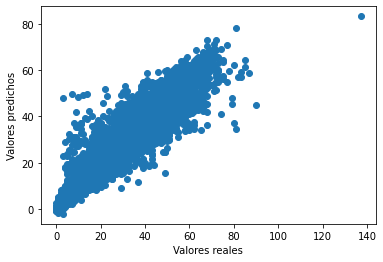

In [278]:
import matplotlib.pyplot as plt

# Obtén los valores reales de congestión y los valores predichos por el modelo
real_values = data['congestion']
predicted_values = model.predict(x)

# Crea el gráfico de dispersión
plt.scatter(real_values, predicted_values)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

#### Gráfico de barras comparando el rendimiento del modelo en los conjuntos de entrenamiento y prueba:

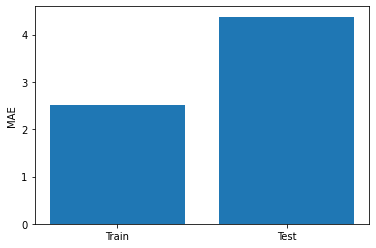

In [279]:
import matplotlib.pyplot as plt

# Calcular el MAE en el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(train_y, model.predict(train_x))
mae_test = mean_absolute_error(val_y, y_pred)

# Crear el gráfico de barras
plt.bar(['Train', 'Test'], [mae_train, mae_test])
plt.ylabel('MAE')
plt.show()

#### Gráfico de importancia de características:

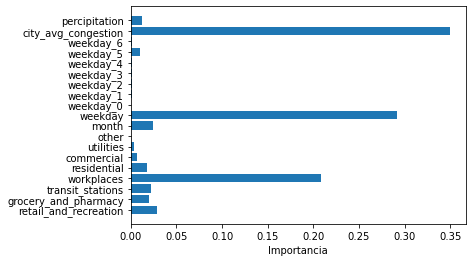

In [193]:
# Obtener la importancia de características
importance = model.feature_importances_

# Crear el gráfico de importancia de características
plt.barh(x.columns, importance)
plt.xlabel('Importancia')
plt.show()

#### Gráfico de error cuadrático medio (MSE) en función del número de árboles en el modelo:

In [194]:
# Calcular el MSE en cada número de árboles
mse_train = []
mse_test = []
for n_trees in range(1, 1000):
    model = GradientBoostingRegressor(n_estimators=n_trees,random_state=0)
    model.fit(train_x, train_y)
    mse_train.append(mean_squared_error(train_y, model.predict(train_x)))
    mse_test.append(mean_squared_error(val_y, model.predict(val_x)))

# Crear el gráfico de MSE en función del número de árboles
plt.plot(range(1, 1000), mse_train, label='Train')
plt.plot(range(1, 1000), mse_test, label='Test')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')

KeyboardInterrupt: 

#### Gráfica de residuales

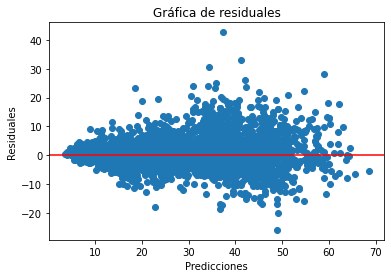

In [281]:
# calcular residuales
residuals = val_y - y_pred

# crear gráfica de residuales
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.axhline(y=0, color='r')
plt.title('Gráfica de residuales')
plt.show()

#### Curva de Aprendizaje:

/Users/ignaciocasado/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ignaciocasado/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ignaciocasado/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ignaciocasado/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ignaciocasado/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:79

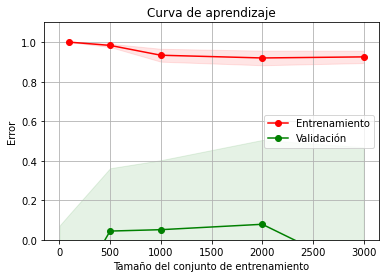

MAE:  4.379302068440087
MSE:  35.627706302667534
Coeficiente de determinación (R^2):  0.8332522548474101


In [291]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(model, x, y, train_sizes = [1, 100, 500, 1000, 2000, 3000], cv = 5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure()
plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error")
plt.ylim(0.0, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validación")
plt.legend(loc="best")
plt.show()

mae = mean_absolute_error(val_y, y_pred)
print("MAE: ", mae)

mse = mean_squared_error(val_y, y_pred)
print("MSE: ", mse)

r2 = model.score(val_x, val_y)
print("Coeficiente de determinación (R^2): ", r2)

In [294]:
y_real = val_y
y_pred = model.predict(val_x)

data['real_or_pred'] = ['real' if y == y_real[i] else 'pred' for i, y in enumerate(y_pred)]

plt.scatter(y_pred, y_pred - y_real, c=data['real_or_pred'].apply(lambda x: 'red' if x == 'real' else 'blue'))

plt.hlines(y=0, xmin=y_real.min(), xmax=y_real.max())
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfico de residuales')
plt.show()

KeyError: 0